In [1]:
import warnings
warnings.simplefilter('ignore')

import SMEFT19 
import matplotlib.pyplot as plt

from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
plt.rcParams['text.usetex'] = True
import flavio
from wilson import Wilson
import numpy as np

In [2]:
wI = Wilson.from_wc(SMEFT19.scenarios.rotBI([-0.11, 0, 0.78]).match_run(4.8, 'WET', 'flavio'))

In [3]:
wII = Wilson.from_wc(SMEFT19.scenarios.rotBII([-0.12, 0.07, 0, -0.076, 0.851]).match_run(4.8, 'WET', 'flavio'))

In [4]:
wIII = Wilson.from_wc(SMEFT19.scenarios.rotBIII([-0.11, -0.13, 0.64]).match_run(4.8, 'WET', 'flavio'))

In [5]:
wc = [wI, wII, wIII]

In [6]:
RD = {}
RD |= {'SM_pred' :flavio.sm_prediction('Rtaul(B->Dlnu)')}
RD |= {'SM_unc' :flavio.sm_uncertainty('Rtaul(B->Dlnu)')}
RD |= {'exp': flavio.combine_measurements('Rtaul(B->Dlnu)').get_central()}
RD |= {'exp_unc-': flavio.combine_measurements('Rtaul(B->Dlnu)').get_error_left()}
RD |= {'exp_unc+': flavio.combine_measurements('Rtaul(B->Dlnu)').get_error_right()}
for i in range(3):
    RD |= {f'sc{i+1}_pred': flavio.np_prediction('Rtaul(B->Dlnu)', wc[i])}
    RD |= {f'sc{i+1}_unc': flavio.np_uncertainty('Rtaul(B->Dlnu)', wc[i])}

In [7]:
RDs = {}
RDs |= {'SM_pred' :flavio.sm_prediction('Rtaul(B->D*lnu)')}
RDs |= {'SM_unc' :flavio.sm_uncertainty('Rtaul(B->D*lnu)')}
RDs |= {'exp': flavio.combine_measurements('Rtaul(B->D*lnu)').get_central()}
RDs |= {'exp_unc-': flavio.combine_measurements('Rtaul(B->D*lnu)').get_error_left()}
RDs |= {'exp_unc+': flavio.combine_measurements('Rtaul(B->D*lnu)').get_error_right()}
for i in range(3):
    RDs |= {f'sc{i+1}_pred': flavio.np_prediction('Rtaul(B->D*lnu)', wc[i])}
    RDs |= {f'sc{i+1}_unc': flavio.np_uncertainty('Rtaul(B->D*lnu)', wc[i])}

In [8]:
RDs_mu = {}
RDs_mu |= {'SM_pred' :flavio.sm_prediction('Rtaumu(B->D*lnu)')}
RDs_mu |= {'SM_unc' :flavio.sm_uncertainty('Rtaumu(B->D*lnu)')}
RDs_mu |= {'exp': flavio.combine_measurements('Rtaumu(B->D*lnu)').get_central()}
RDs_mu |= {'exp_unc-': flavio.combine_measurements('Rtaumu(B->D*lnu)').get_error_left()}
RDs_mu |= {'exp_unc+': flavio.combine_measurements('Rtaumu(B->D*lnu)').get_error_right()}
for i in range(3):
    RDs_mu |= {f'sc{i+1}_pred': flavio.np_prediction('Rtaumu(B->D*lnu)', wc[i])}
    RDs_mu |= {f'sc{i+1}_unc': flavio.np_uncertainty('Rtaumu(B->D*lnu)', wc[i])}

In [9]:
RJpsi = {}
RJpsi |= {'SM_pred' :flavio.sm_prediction('Rtaumu(Bc->J/psilnu)')}
RJpsi |= {'SM_unc' :flavio.sm_uncertainty('Rtaumu(Bc->J/psilnu)')}
RJpsi |= {'exp': flavio.combine_measurements('Rtaumu(Bc->J/psilnu)').get_central()}
RJpsi |= {'exp_unc-': flavio.combine_measurements('Rtaumu(Bc->J/psilnu)').get_error_left()}
RJpsi |= {'exp_unc+': flavio.combine_measurements('Rtaumu(Bc->J/psilnu)').get_error_right()}
for i in range(3):
    RJpsi |= {f'sc{i+1}_pred': flavio.np_prediction('Rtaumu(Bc->J/psilnu)', wc[i])}
    RJpsi |= {f'sc{i+1}_unc': flavio.np_uncertainty('Rtaumu(Bc->J/psilnu)', wc[i])}

In [10]:
obs_RD = [RD, RDs, RDs_mu, RJpsi]

In [11]:
markers = ['o', '^', 's']

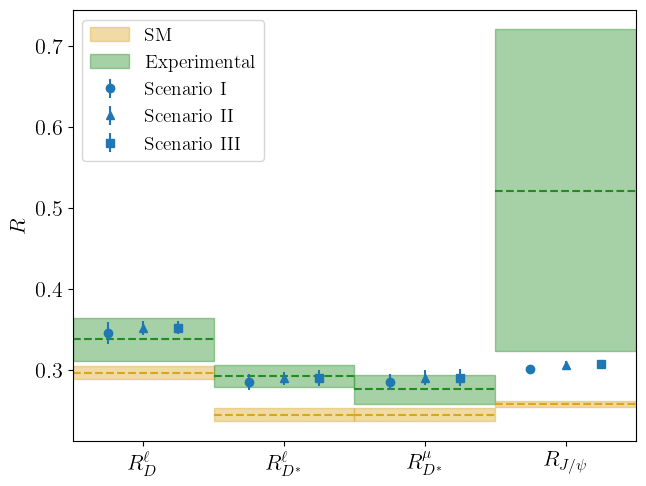

In [12]:
label_SM = ['SM',] + [None,]*(len(obs_RD)-1)
label_exp = ['Experimental',] + [None,]*(len(obs_RD)-1)
label_sc = [['Scenario I',] + [None,]*(len(obs_RD)-1), ['Scenario II',] + [None,]*(len(obs_RD)-1), ['Scenario III',] + [None,]*(len(obs_RD)-1)]

for j in range(len(obs_RD)):
    plt.fill_between([j,j+1], obs_RD[j]['SM_pred']-obs_RD[j]['SM_unc'], obs_RD[j]['SM_pred']+obs_RD[j]['SM_unc'], color='goldenrod', alpha=0.4, label=label_SM[j])
    plt.plot([j, j+1], [obs_RD[j]['SM_pred'], obs_RD[j]['SM_pred']], c='goldenrod', ls='dashed')

    plt.fill_between([j,j+1], obs_RD[j]['exp']-obs_RD[j]['exp_unc-'], obs_RD[j]['exp']+obs_RD[j]['exp_unc+'], color='forestgreen', alpha=0.4, label = label_exp[j])
    plt.plot([j, j+1], [obs_RD[j]['exp'], obs_RD[j]['exp']], c='forestgreen', ls='dashed')

    for i in range(3):
        plt.errorbar([j+0.25*(1+i)], [obs_RD[j][f'sc{i+1}_pred']], [obs_RD[j][f'sc{i+1}_unc']], fmt=markers[i], c='tab:blue', label=label_sc[i][j])
plt.xticks([0.5, 1.5, 2.5, 3.5], [r'$R_D^\ell$', r'$R_{D^*}^\ell$', r'$R_{D^*}^\mu$', r'$R_{J/\psi}$'], fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=14)
plt.ylabel('$R$', fontsize=16)

plt.xlim(0, len(obs_RD))
plt.tight_layout(pad=0.5)
plt.savefig('observables_RD.pdf')

In [13]:
BRK = {}
BRK |= {'SM_pred' :flavio.sm_prediction('BR(B+->Knunu)')*1e5}
BRK |= {'SM_unc' :flavio.sm_uncertainty('BR(B+->Knunu)')*1e5}
BRK |= {'exp': flavio.combine_measurements('BR(B+->Knunu)').get_central()*1e5}
BRK |= {'exp_unc-': flavio.combine_measurements('BR(B+->Knunu)').get_error_left()*1e5}
BRK |= {'exp_unc+': flavio.combine_measurements('BR(B+->Knunu)').get_error_right()*1e5}
for i in range(3):
    BRK |= {f'sc{i+1}_pred': flavio.np_prediction('BR(B+->Knunu)', wc[i])*1e5}
    BRK |= {f'sc{i+1}_unc': flavio.np_uncertainty('BR(B+->Knunu)', wc[i])*1e5}

In [14]:
BRKs = {}
BRKs |= {'SM_pred' :flavio.sm_prediction('BR(B0->K*nunu)')*1e5}
BRKs |= {'SM_unc' :flavio.sm_uncertainty('BR(B0->K*nunu)')*1e5}
BRKs |= {'exp': flavio.combine_measurements('BR(B0->K*nunu)').get_central()*1e5}
BRKs |= {'exp_unc-': flavio.combine_measurements('BR(B0->K*nunu)').get_error_left()*1e5}
BRKs |= {'exp_unc+': flavio.combine_measurements('BR(B0->K*nunu)').get_error_right()*1e5}
for i in range(3):
    BRKs |= {f'sc{i+1}_pred': flavio.np_prediction('BR(B0->K*nunu)', wc[i])*1e5}
    BRKs |= {f'sc{i+1}_unc': flavio.np_uncertainty('BR(B0->K*nunu)', wc[i])*1e5}

In [15]:
obs_BRK = [BRK, BRKs]

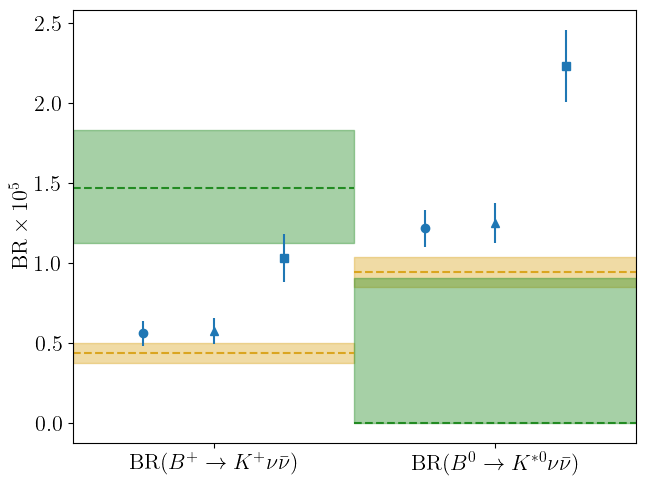

In [16]:
label_SM = ['SM',] + [None,]*(len(obs_BRK)-1)
label_exp = ['Experimental',] + [None,]*(len(obs_BRK)-1)
label_sc = [['Scenario I',] + [None,]*(len(obs_BRK)-1), ['Scenario II',] + [None,]*(len(obs_BRK)-1), ['Scenario III',] + [None,]*(len(obs_BRK)-1)]

for j in range(len(obs_BRK)):
    plt.fill_between([j,j+1], obs_BRK[j]['SM_pred']-obs_BRK[j]['SM_unc'], obs_BRK[j]['SM_pred']+obs_BRK[j]['SM_unc'], color='goldenrod', alpha=0.4, label=label_SM[j])
    plt.plot([j, j+1], [obs_BRK[j]['SM_pred'], obs_BRK[j]['SM_pred']], c='goldenrod', ls='dashed')

    plt.fill_between([j,j+1], obs_BRK[j]['exp']-obs_BRK[j]['exp_unc-'], obs_BRK[j]['exp']+obs_BRK[j]['exp_unc+'], color='forestgreen', alpha=0.4, label = label_exp[j])
    plt.plot([j, j+1], [obs_BRK[j]['exp'], obs_BRK[j]['exp']], c='forestgreen', ls='dashed')

    for i in range(3):
        plt.errorbar([j+0.25*(1+i)], [obs_BRK[j][f'sc{i+1}_pred']], [obs_BRK[j][f'sc{i+1}_unc']], fmt=markers[i], c='tab:blue', label=label_sc[i][j])
plt.xticks([0.5, 1.5], [r'$\mathrm{BR}(B^+ \to K^+\nu\bar{\nu})$', r'$\mathrm{BR}(B^0 \to K^{*0}\nu\bar{\nu})$'], fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel(r'$\mathrm{BR}\times 10^5$', fontsize=16)

plt.xlim(0, len(obs_BRK))

plt.tight_layout(pad=0.5)
plt.savefig('observables_BKnunu.pdf')

In [17]:
flavio.combine_measurements('BR(B0->K*nunu)').get_error_right()

9.083179034642552e-06

In [18]:
flavio.combine_measurements('BR(B0->K*nunu)').get_error_left()

0.0

In [19]:
covRD_SM = flavio.sm_covariance(['Rtaul(B->Dlnu)', 'Rtaul(B->D*lnu)'])

In [20]:
covRD_SM

array([[ 5.82656189e-05, -3.53318847e-06],
       [-3.53318847e-06,  6.51105537e-05]])

In [21]:
def confidence_ellipse(cov, mean_x, mean_y, ax, n_std=3.0, facecolor='none', **kwargs):

    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    print(pearson)
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [22]:
covRD_exp = np.matrix(np.diag([RD['exp_unc+'], RDs['exp_unc+']])) @ np.matrix([[1, -0.39], [-0.39, 1]]) @ np.matrix(np.diag([RD['exp_unc+'], RDs['exp_unc+']])) 

In [23]:
covRD_SM

array([[ 5.82656189e-05, -3.53318847e-06],
       [-3.53318847e-06,  6.51105537e-05]])

In [24]:
covRD_ml = np.matrix([[1.04953200e-04, 8.64909766e-05],
       [8.64909766e-05, 7.12764266e-05]])

-0.05736340566969781
-0.38999999999999996
0.9999999984618148


Text(0, 0.5, '$R_{D^*}^\\ell$')

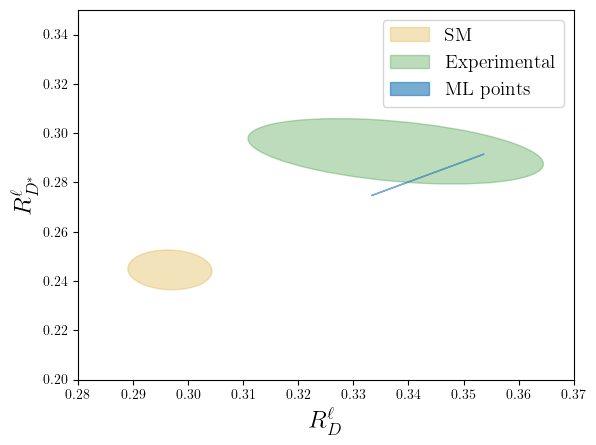

In [25]:
ax = plt.gca()
confidence_ellipse(covRD_SM, RD['SM_pred'], RDs['SM_pred'], ax, 1, facecolor='goldenrod', alpha=0.3, edgecolor='goldenrod', label='SM')
confidence_ellipse(covRD_exp, RD['exp'], RDs['exp'], ax, 1, facecolor='forestgreen', alpha=0.3, edgecolor='forestgreen', label='Experimental')
confidence_ellipse(covRD_ml, 0.343509, 0.283080, ax, 1, edgecolor='tab:blue', label = 'ML points', facecolor='tab:blue', alpha=0.6)
plt.xlim(0.28, 0.37)
plt.ylim(0.2, 0.35)
plt.legend(fontsize=14)
plt.xlabel(r'$R_D^\ell$', fontsize=18)
plt.ylabel(r'$R_{D^*}^\ell$', fontsize=18)

In [26]:
covRDBR = flavio.sm_covariance(['Rtaul(B->D*lnu)', 'BR(B+->Knunu)'])

In [27]:
covRDBR[0,1] *= 1e5
covRDBR[1,0] *= 1e5
covRDBR[1,1] *= 1e10

In [28]:
covRDBR_ml = np.matrix([[7.12764266e-05, 9.05890253e-05],
       [9.05890253e-05, 1.57465692e-01]])

-0.15203723649279824
0.0
0.027040184750755238


(0.22, 0.32)

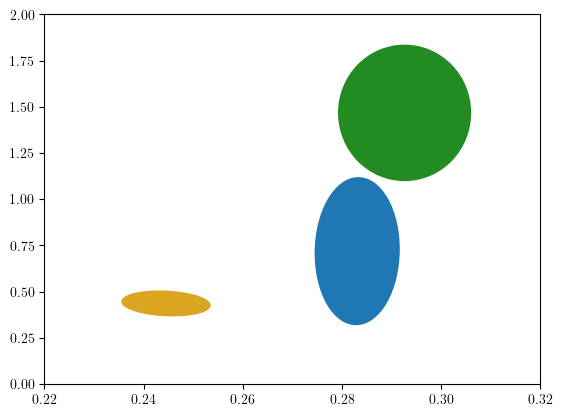

In [29]:
ax = plt.gca()
confidence_ellipse(covRDBR, RDs['SM_pred'], BRK['SM_pred'], ax, 1, 'goldenrod', edgecolor='goldenrod')
confidence_ellipse(np.matrix([[RDs['exp_unc+']**2, 0], [0, BRK['exp_unc+']**2]]), RDs['exp'], BRK['exp'], ax, 1, 'forestgreen', edgecolor='forestgreen')
plt.ylim(0,2)
confidence_ellipse(covRDBR_ml, 0.283080, 7.187924218905508e-1, ax, 1, 'tab:blue', edgecolor='tab:blue')
plt.xlim(0.22, 0.32)

In [30]:
np.matrix([[RDs['exp_unc+']**2, 0], [0, BRK['exp_unc+']**2]])

matrix([[0.00017643, 0.        ],
        [0.        , 0.13357028]])

In [31]:
covRDBR

array([[ 7.86277650e-05, -8.96798498e-05],
       [-8.96798498e-05,  4.42500616e-03]])

In [32]:
BRK

{'SM_pred': 0.43586197885628436,
 'SM_unc': 0.06349216582205483,
 'exp': 1.4670000992891374,
 'exp_unc-': 0.3399977935998039,
 'exp_unc+': 0.36547268274696765,
 'sc1_pred': 0.5615626470038817,
 'sc1_unc': 0.0773253792895214,
 'sc2_pred': 0.5772308280962162,
 'sc2_unc': 0.08265961766725613,
 'sc3_pred': 1.0307390300682302,
 'sc3_unc': 0.15072454506023403}

In [33]:
import pandas as pd

In [34]:
data_scII = pd.read_csv('../01_global_fits/random_scII.dat')

In [35]:
cov_scIIII =np.cov(data_scII['RD*'], data_scII['BKnunu'])

In [56]:
data_scIII = pd.read_csv('../03_ml/observables.csv')

In [57]:
data_scIII.describe()

,RD,RD*,RD*_mu,RJpsi,BKnunu,BKsnunu,RK,RK*,RK*_low
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.343509,0.283080,0.283531,0.298817,0.000007,0.000016,1.000911,0.996076,0.924465
std,0.010245,0.008443,0.008456,0.008912,0.000004,0.000009,0.000032,0.000081,0.000219
min,0.309798,0.255299,0.255706,0.269492,0.000003,0.000006,1.000816,0.995841,0.923888
25%,0.336389,0.277213,0.277655,0.292624,0.000004,0.000008,1.000887,0.996021,0.924312
50%,0.343239,0.282858,0.283308,0.298583,0.000006,0.000014,1.000911,0.996074,0.924455
75%,0.350324,0.288697,0.289157,0.304746,0.000009,0.000020,1.000932,0.996136,0.924621
max,0.374651,0.308745,0.309237,0.325909,0.000022,0.000047,1.001009,0.996332,0.925210


-0.15203723649279824
-0.15203723649279824
0.0
0.0


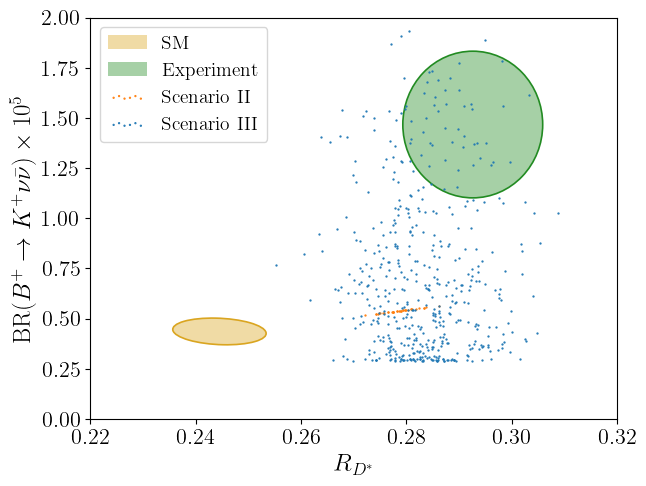

In [69]:
ax = plt.gca()

confidence_ellipse(covRDBR, RDs['SM_pred'], BRK['SM_pred'], ax, 1, 'goldenrod', alpha=0.4, label='SM')
confidence_ellipse(covRDBR, RDs['SM_pred'], BRK['SM_pred'], ax, 1, edgecolor='goldenrod', lw=1.2)
#plt.annotate('SM', (0.245, 0.55), color='goldenrod', fontsize=15)

confidence_ellipse(np.matrix([[RDs['exp_unc+']**2, 0], [0, BRK['exp_unc+']**2]]), RDs['exp'], BRK['exp'], ax, 1, 'forestgreen', alpha=0.4, label='Experiment')
confidence_ellipse(np.matrix([[RDs['exp_unc+']**2, 0], [0, BRK['exp_unc+']**2]]), RDs['exp'], BRK['exp'], ax, 1, edgecolor='forestgreen', lw=1.2)
#plt.annotate('Experiment', (0.282, 1.44), color='forestgreen', fontsize=15)

#confidence_ellipse(covRDBR_ml, 0.283080, 7.187924218905508e-1, ax, 1, 'tab:blue', alpha=0.4)
#confidence_ellipse(covRDBR_ml, 0.283080, 7.187924218905508e-1, ax, 1, edgecolor='tab:blue', lw=1.2, label='Scenario III')

plt.scatter(data_scII['RD*'], data_scII['BKnunu'], s=0.4, c='tab:orange', label='Scenario II')
plt.scatter(data_scIII['RD*'][500:], data_scIII['BKnunu'][500:]*1e5, s=0.4, c='tab:blue', label='Scenario III')

#plt.plot(np.linspace(RDs['sc2_pred']-RDs['sc2_unc'], RDs['sc2_pred']+RDs['sc2_unc'], 200), [BRK['sc2_pred']+(r-RDs['sc2_pred'])*BRKs['sc2_unc']/RDs['sc2_unc'] for r in np.linspace(RDs['sc2_pred']-RDs['sc2_unc'], RDs['sc2_pred']+RDs['sc2_unc'], 200)], c='tab:orange', lw=1.2, label='Scenario II')


plt.xlim(0.22, 0.32)
plt.ylim(0,2)
plt.legend(fontsize=14, scatterpoints=6)

plt.xlabel(r'$R_{D^*}$', fontsize=18)
plt.ylabel(r'$\mathrm{BR}(B^+\to K^+ \nu\bar{\nu})\times 10^5$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout(pad=0.5)
plt.savefig('correlation_RDs_BKnunu.pdf')

In [57]:
np.mean(data_scII['RD*'])

0.3483282089475941

(0.0, 2.0)

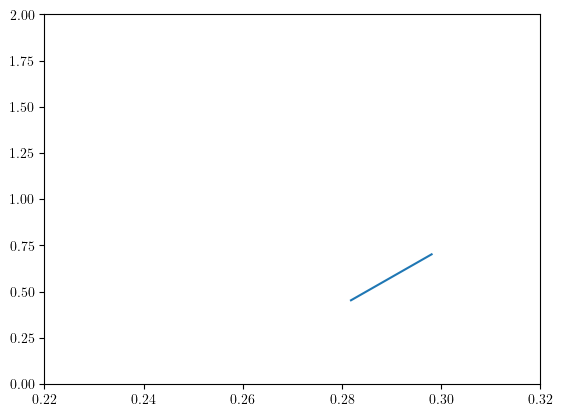

In [38]:
plt.plot(np.linspace(RDs['sc2_pred']-RDs['sc2_unc'], RDs['sc2_pred']+RDs['sc2_unc'], 200), [BRK['sc2_pred']+(r-RDs['sc2_pred'])*BRKs['sc2_unc']/RDs['sc2_unc'] for r in np.linspace(RDs['sc2_pred']-RDs['sc2_unc'], RDs['sc2_pred']+RDs['sc2_unc'], 200)])
plt.xlim(0.22, 0.32)
plt.ylim(0, 2)

In [54]:
data_scII.describe()

,C,al,bl,aq,bq,likelihood,RD*,BKnunu
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,-0.090796,0.055328,0.000657,-0.058147,0.849436,18.572357,0.278642,0.538740
std,0.008050,0.007054,0.000117,0.009830,0.000310,0.868047,0.003096,0.010390
min,-0.110618,0.043531,0.000484,-0.075448,0.848694,16.801760,0.272150,0.517495
25%,-0.095613,0.049533,0.000589,-0.063617,0.849239,17.933684,0.276589,0.531773
50%,-0.091143,0.055261,0.000633,-0.058725,0.849444,18.667246,0.278738,0.539053
75%,-0.085402,0.059282,0.000684,-0.050848,0.849637,19.199814,0.280511,0.544891
max,-0.073947,0.070198,0.001072,-0.041297,0.849967,20.146599,0.286308,0.564884
